In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [64]:
def non_linear_reg(x,y,k_values,t,num_exercise,plotting=False,title='',xlim=[-0.1,1.1],ylim=[-2,2]):
 
    
    # Start the plot which will contain all the fitted curves and training points
    if plotting:
        fig, ax = plt.subplots(figsize=[15,10]) 
        ax.scatter(x, y, s=50)
    
    MSE_k=[]
    wk_k=[]
        
    # Fitting curves to data using polynomial bases of dimension k=1,..4
    m=len(x)
    for k in k_values:
        
      
        
        # Feature map computation using training data points
        phi=np.zeros((m,k)) 
        for i in range(k):
            if num_exercise==3:
                phi[:,i]=np.sin((i+1)*np.math.pi*x)
            else:
                phi[:,i]=np.power(x,i)
            
        
        # Computing inverse feature map and weights using appropriate math equation
        if k<=10:
            phi_t=np.transpose(phi)
            phi_1 = np.linalg.inv(np.dot(phi_t,phi)) 
            wk=np.dot(np.dot(phi_1,phi_t),y)
        else:  
            # For big degrees due to numerical error use different approach
            wk = np.linalg.lstsq(phi, y, rcond=None)[0]
        
        wk_k.append(wk)
        
        
        # Forming the equation coresponding to the curve fitted and forming the curve to be plotted
        func=np.zeros(len(t))
        equation='k = '+str(k)+' => '
        
        for i in range(k):
            if num_exercise==3:
                func=func+np.sin((i+1)*np.math.pi*t)*wk[i]
            else:
                func=func+np.power(t,i)*wk[i]
            if num_exercise==1:
                equation+=str(round(wk[i],2))+'*x^'+str(i)+'+'
            
            
         
          
        # Calculating MSE error for dimension k
        error=np.dot(phi,wk)-y
        trans_error=np.transpose(error)
        MSE=(np.dot(trans_error,error))/m
        
        MSE_k.append(MSE)
        
        # Printing the equation coresponding to the curve fitted for dimension k with appropriate MSE
        # for exercise 1
        if num_exercise==1:
            equation+=' ln MSE train ='+str(MSE)
        else:
            equation+=' ln MSE train ='+str(np.log(MSE))
        if plotting:
            print(equation)  
            
            # Plotting fitted curves 
            ax.plot(t,func,label='k = '+str(k))   
       
        
    if plotting:   
        leg = ax.legend();    
        plt.title(title)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.grid()
        plt.savefig(title+'.png')
        plt.show()
    
    return MSE_k, wk_k

def testing(x_test,y_test,wk,k_values,num_exercise,printing=True):
    
    m1=len(x_test)
    MSE_test_k=[]
    
    for ki in range(len(k_values)):
        
        k=k_values[ki]
        
        equation='k = '+str(k)+' => '
        # Feature map computation using test data set T
        phi_test=np.zeros((m1,k))
        for i in range(k):
            if num_exercise==3:
                phi_test[:,i]=np.sin(i*np.math.pi*x_test)
            else:
                phi_test[:,i]=np.power(x_test,i)
            
        
        # Calculating test MSE error for dimension k
        error_test=np.dot(phi_test,wk[ki])-y_test
        trans_error=np.transpose(error_test)
        MSE=np.dot(trans_error,error_test)/m1
        
        equation+=' ln MSE test ='+str(np.log(MSE))
        if printing:
            print(equation)
        MSE_test_k.append(MSE)
        
    return MSE_test_k

def generate(x,sigma):
    # Function that generates data set which is made by applying Gsigma function  on
    # input variables x using standard deviation sigma
    
    epsilon = np.random.normal(0,sigma,len(x))
    g=np.square((np.sin(2*np.math.pi*x)))+epsilon
    
    return g
        

k = 1 => 2.5*x^0+ ln MSE train =3.25
k = 2 => 1.5*x^0+0.4*x^1+ ln MSE train =3.0500000000000003
k = 3 => 9.0*x^0+-7.1*x^1+1.5*x^2+ ln MSE train =0.8000000000000004
k = 4 => -5.0*x^0+15.17*x^1+-8.5*x^2+1.33*x^3+ ln MSE train =7.119942986162764e-25


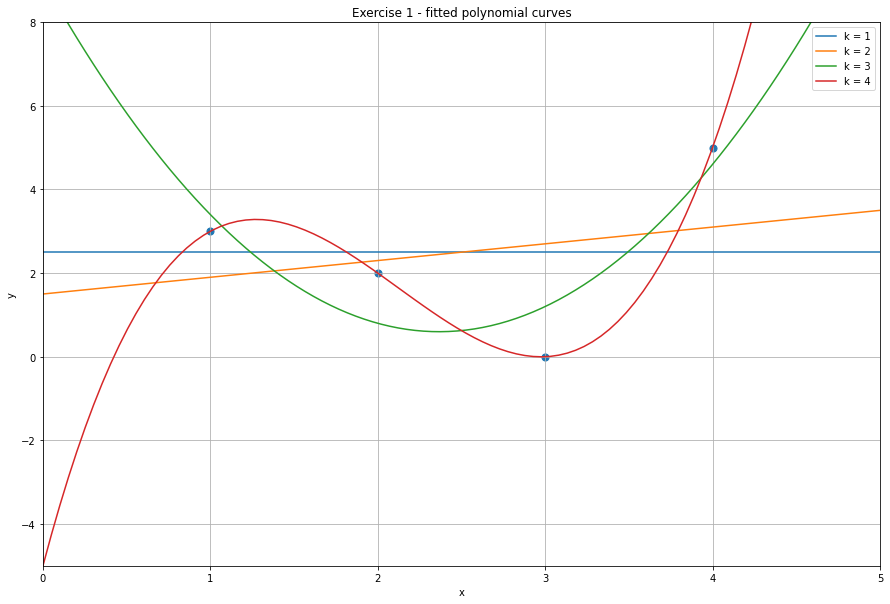

In [65]:
# Exercise 1 - regression

# Form training points (x,y)
x = np.transpose(np.array([1.0, 2.0, 3.0, 4.0]))
y = np.transpose(np.array([3.0, 2.0, 0.0, 5.0]))
t = np.linspace(0, 5, 100)

_, _=non_linear_reg(x,y,[1,2,3,4],t,1,True,'Exercise 1 - fitted polynomial curves',[0,5],[-5,8])


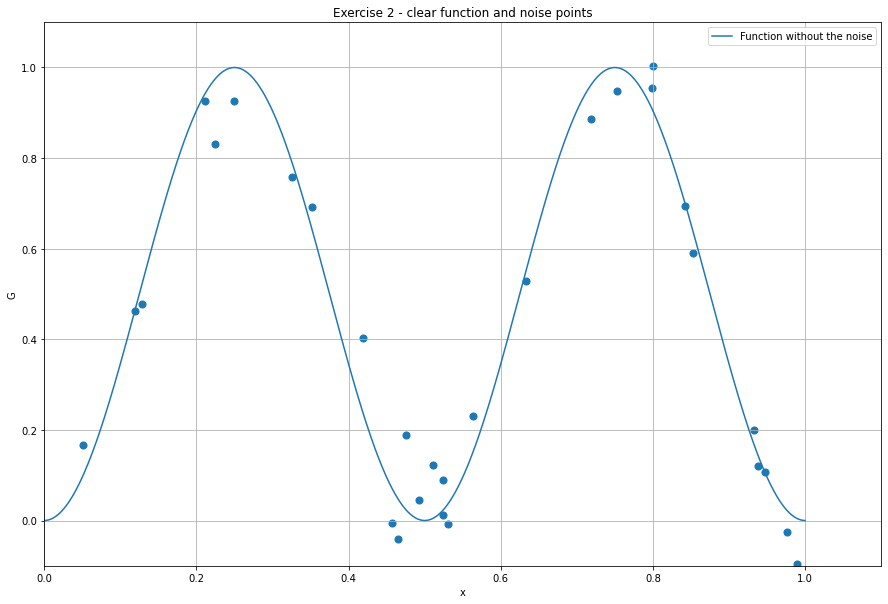

In [66]:
# Exercise 2 - generating data


# Generating training data set S of 30 points 
x = np.transpose(np.random.uniform(0,1,30))
m= len(x)
y = generate(x,0.07)

# Generate the test data set T
x_test = np.transpose(np.random.uniform(0,1,1000))
m1=len(x_test)
y_test = generate(x_test,0.07)


# Ploting sin^2(2pit) function and scattered noisy points of function Gsigma
t = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize=[15,10])
func=np.square((np.sin(2*np.math.pi*t)))
ax.plot(t,func,label='Function without the noise')
ax.scatter(x, y, s=50)
leg = ax.legend();
plt.title('Exercise 2 - clear function and noise points')
plt.xlabel('x')
plt.ylabel('G')
plt.xlim([0,1.1])
plt.ylim([-0.1,1.1])
plt.grid()
plt.savefig('Exercise 2 - clear function and noise points.png')
plt.show()  


k = 2 =>  ln MSE train =-2.0295037011692587
k = 5 =>  ln MSE train =-3.531507710439238
k = 10 =>  ln MSE train =-5.576606706570628
k = 14 =>  ln MSE train =-5.836790350878505
k = 18 =>  ln MSE train =-5.854930215843977


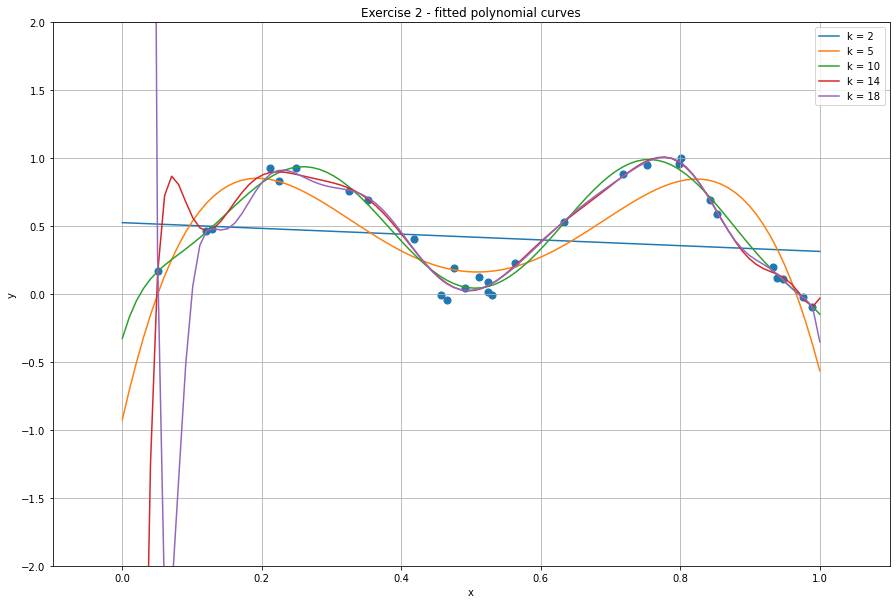

k = 2 =>  ln MSE test =-1.9199423480910176
k = 5 =>  ln MSE test =-2.9070822665733473
k = 10 =>  ln MSE test =-4.922197670476912
k = 14 =>  ln MSE test =2.1514904924925107
k = 18 =>  ln MSE test =6.735444192049336


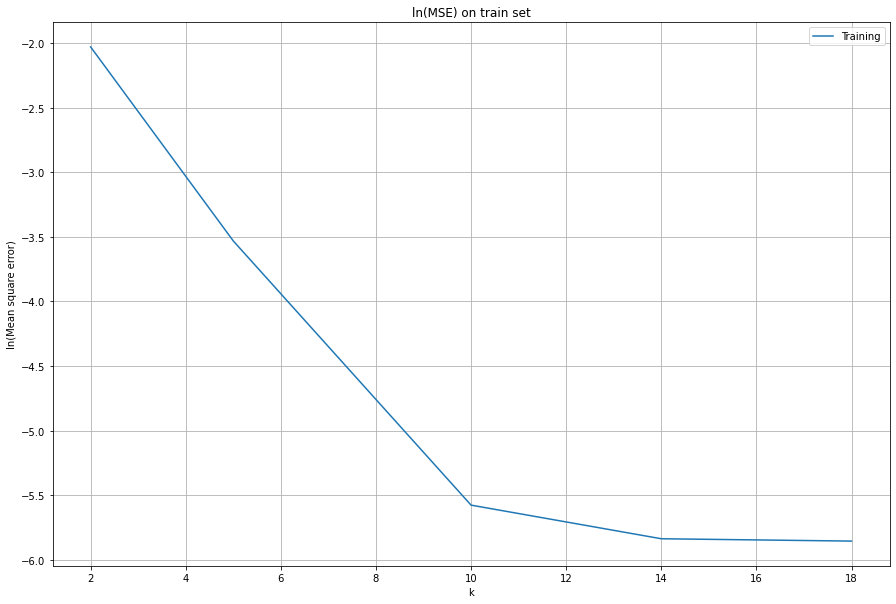

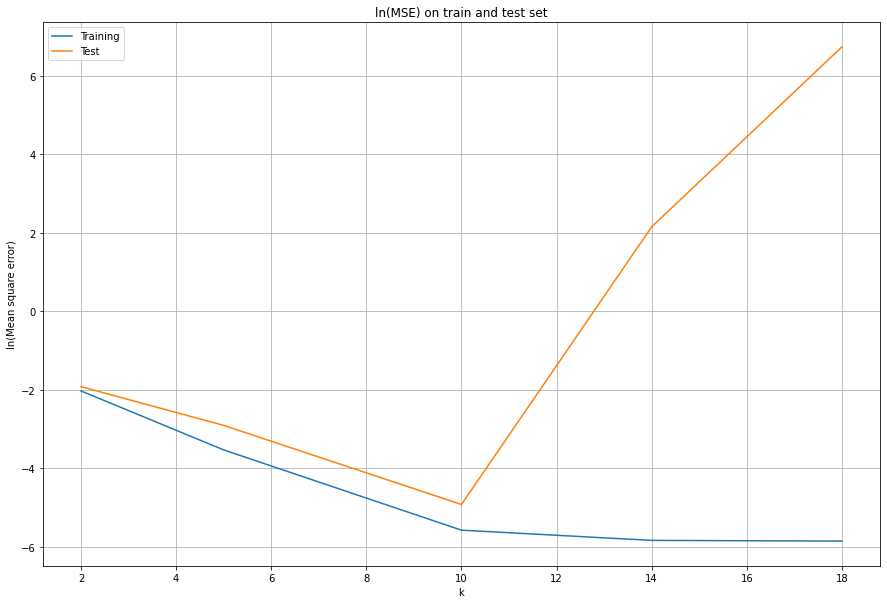

In [67]:
# Exercise 2 - regression
k_values=[2,5,10,14,18]
t = np.linspace(0, 1, 100)
MSE_train,wk_k=non_linear_reg(x,y,k_values,t,2,True,'Exercise 2 - fitted polynomial curves')
MSE_test = testing(x_test,y_test,wk_k,k_values,2)

# ln(MSE) plot for the train and test set over dimensions k
fig, ax = plt.subplots(figsize=[15,10])
ax.plot(k_values,np.log(MSE_train),label='Training')
plt.grid()
leg = ax.legend();
plt.xlabel('k')
plt.ylabel('ln(Mean square error)')
plt.title('ln(MSE) on train set')
plt.savefig('ln(MSE) on train set1.png')
plt.show()

# ln(MSE) plot for the train and test set over dimensions k
fig, ax = plt.subplots(figsize=[15,10])
ax.plot(k_values,np.log(MSE_train),label='Training')
ax.plot(k_values,np.log(MSE_test),label='Test')
plt.grid()
leg = ax.legend();
plt.xlabel('k')
plt.ylabel('ln(Mean square error)')
plt.title('ln(MSE) on train and test set')
plt.savefig('ln(MSE) on train and test set1.png')
plt.show() 

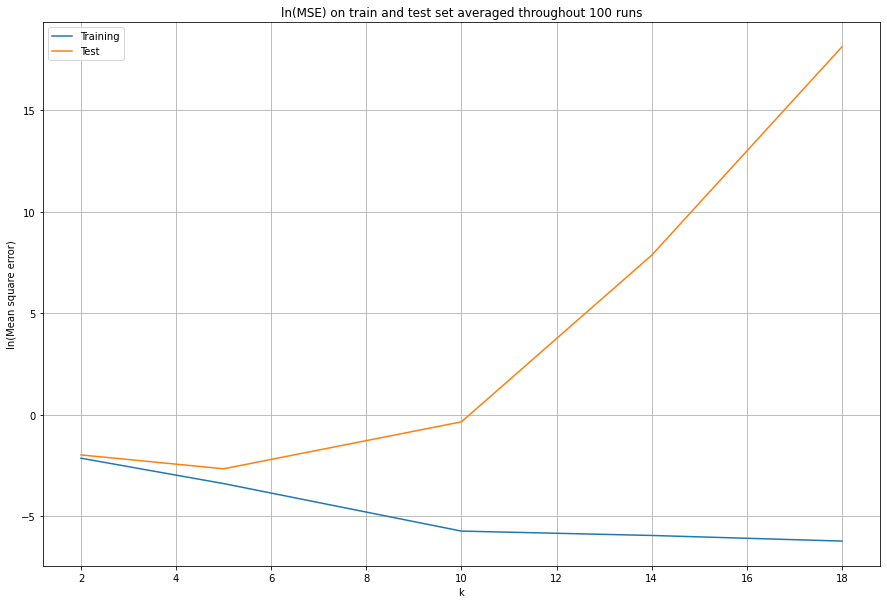

In [70]:
# Exercise 2 - over 100 runs

# Initialize the MSE value for train and data sets over all k dimensions and 100 runs
MSE_train_100=[]
MSE_test_100=[]
k_values=[2,5,10,14,18]

for runs in range(100):
    
    # Generating training data set S of 30 points 
    x = np.transpose(np.random.uniform(0,1,30))
    m= len(x)
    y = generate(x,0.07)
    
    # Generate the test data set T
    x_test = np.transpose(np.random.uniform(0,1,1000))
    m1=len(x_test)
    y_test = generate(x_test,0.07)
    
    
    MSE_train,wk_k=non_linear_reg(x,y,k_values,t,2)
    MSE_test = testing(x_test,y_test,wk_k,k_values,2,False)
    
    MSE_train_100.append(MSE_train)
    MSE_test_100.append(MSE_test)
    
  
MSE_train_100=np.asarray(MSE_train_100)  
MSE_test_100=np.asarray(MSE_test_100)   

MSE_train_100=np.sum(MSE_train_100,axis=0)/100
MSE_test_100=np.sum(MSE_test_100,axis=0)/100

# ln(MSE) plot for the train and test set over dimensions k
fig, ax = plt.subplots(figsize=[15,10])
ax.plot(k_values,np.log(MSE_train_100),label='Training')
ax.plot(k_values,np.log(MSE_test_100),label='Test')
plt.grid()
leg = ax.legend();
plt.xlabel('k')
plt.ylabel('ln(Mean square error)')
plt.title('ln(MSE) on train and test set averaged throughout 100 runs')
plt.savefig('ln(MSE) on train and test set averaged throughout 100 runs 1.png')
plt.show() 



k = 1 =>  ln MSE train =-1.8369041206055237
k = 2 =>  ln MSE train =-1.881358133157419
k = 3 =>  ln MSE train =-3.689382329370137
k = 4 =>  ln MSE train =-3.708263004374312
k = 5 =>  ln MSE train =-5.291436284625595
k = 6 =>  ln MSE train =-5.303509743091236
k = 7 =>  ln MSE train =-5.4064441522246645
k = 8 =>  ln MSE train =-5.409755169475279
k = 9 =>  ln MSE train =-5.4114105984835135
k = 10 =>  ln MSE train =-5.411820009345356
k = 11 =>  ln MSE train =-5.428494966362072
k = 12 =>  ln MSE train =-5.543867764531965
k = 13 =>  ln MSE train =-5.54745427516042
k = 14 =>  ln MSE train =-5.588407815981237
k = 15 =>  ln MSE train =-5.682059412026237
k = 16 =>  ln MSE train =-5.774203428146478
k = 17 =>  ln MSE train =-5.774443237000895
k = 18 =>  ln MSE train =-5.894671639372202


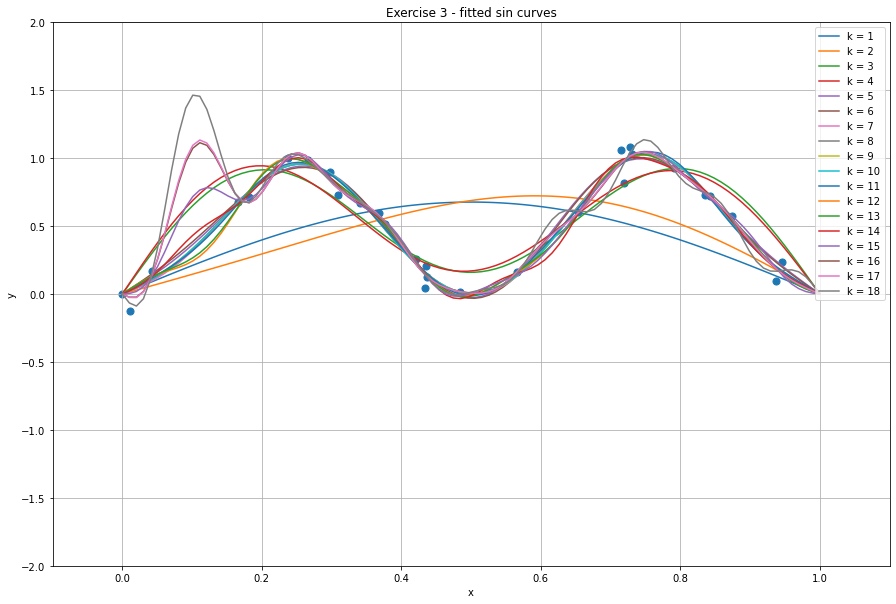

k = 1 =>  ln MSE test =-0.9445262403989969
k = 2 =>  ln MSE test =-0.743308218238141
k = 3 =>  ln MSE test =-0.5990993437303199
k = 4 =>  ln MSE test =-0.6358280618721308
k = 5 =>  ln MSE test =-0.5631094489748271
k = 6 =>  ln MSE test =-0.560405513064518
k = 7 =>  ln MSE test =-0.547592925490399
k = 8 =>  ln MSE test =-0.5486951298768498
k = 9 =>  ln MSE test =-0.5486798301623161
k = 10 =>  ln MSE test =-0.5485739744340079
k = 11 =>  ln MSE test =-0.5455418438485727
k = 12 =>  ln MSE test =-0.5378376766390618
k = 13 =>  ln MSE test =-0.541863375247426
k = 14 =>  ln MSE test =-0.5610758194820045
k = 15 =>  ln MSE test =-0.5758624595547915
k = 16 =>  ln MSE test =-0.6042888240522316
k = 17 =>  ln MSE test =-0.6026058729169921
k = 18 =>  ln MSE test =-0.5941306555207495


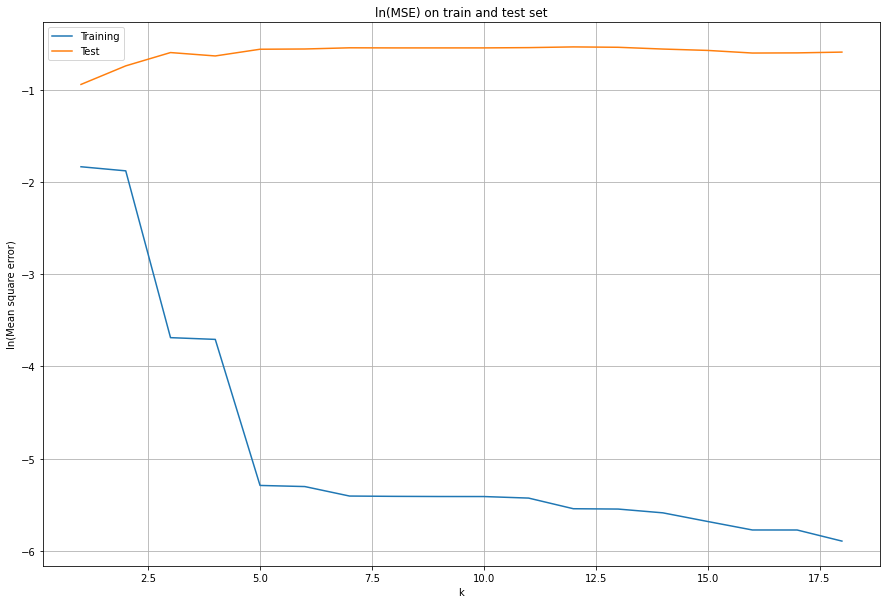

In [71]:
# Exercise 3 - generating data and regression

# Generating training data set S of 30 points 
x = np.transpose(np.random.uniform(0,1,30))
m= len(x)
y = generate(x,0.07)

# Generate the test data set T
x_test = np.transpose(np.random.uniform(0,1,1000))
m1=len(x_test)
y_test = generate(x_test,0.07)


# In[] Exercise 3 - regression
k_values=list(range(1,19))
t = np.linspace(0, 1, 100)
MSE_train,wk_k=non_linear_reg(x,y,k_values,t,3,True,'Exercise 3 - fitted sin curves')
MSE_test = testing(x_test,y_test,wk_k,k_values,3)

# ln(MSE) plot for the train and test set over dimensions k
fig, ax = plt.subplots(figsize=[15,10])
ax.plot(k_values,np.log(MSE_train),label='Training')
ax.plot(k_values,np.log(MSE_test),label='Test')
plt.grid()
leg = ax.legend();
plt.xlabel('k')
plt.ylabel('ln(Mean square error)')
plt.title('ln(MSE) on train and test set')
plt.savefig('ln(MSE) on train and test set2.png')
plt.show() 

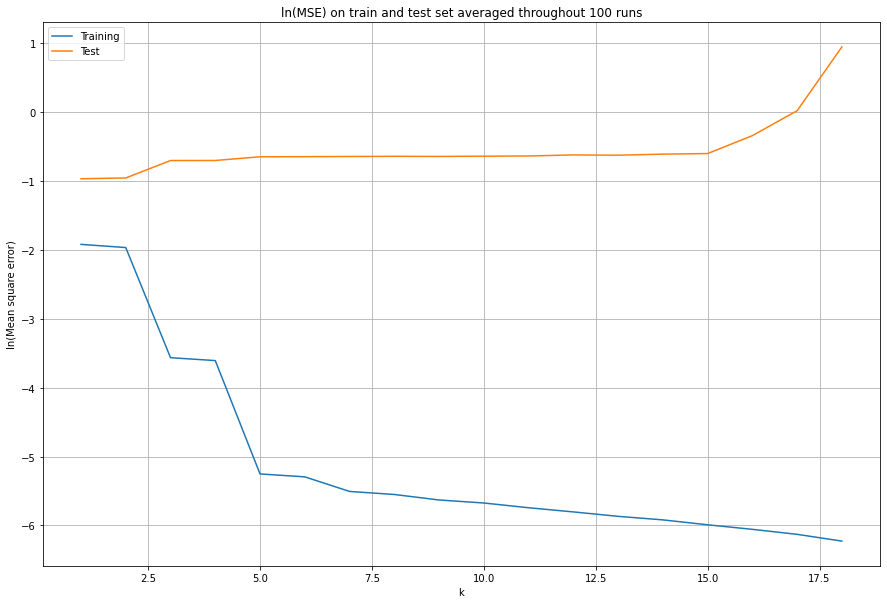

In [72]:
# Exercise 3 - 100 runs

# Initialize the MSE value for train and data sets over all k dimensions and 100 runs
MSE_train_100=[]
MSE_test_100=[]
k_values=list(range(1,19))

for runs in range(100):
    
    # Generating training data set S of 30 points 
    x = np.transpose(np.random.uniform(0,1,30))
    m= len(x)
    y = generate(x,0.07)
    
    # Generate the test data set T
    x_test = np.transpose(np.random.uniform(0,1,1000))
    m1=len(x_test)
    y_test = generate(x_test,0.07)
    
    
    MSE_train,wk_k=non_linear_reg(x,y,k_values,t,3)
    MSE_test = testing(x_test,y_test,wk_k,k_values,3,False)
    
    MSE_train_100.append(MSE_train)
    MSE_test_100.append(MSE_test)
    
  
MSE_train_100=np.asarray(MSE_train_100)  
MSE_test_100=np.asarray(MSE_test_100)   

MSE_train_100=np.sum(MSE_train_100,axis=0)/100
MSE_test_100=np.sum(MSE_test_100,axis=0)/100

# ln(MSE) plot for the train and test set over dimensions k
fig, ax = plt.subplots(figsize=[15,10])
ax.plot(k_values,np.log(MSE_train_100),label='Training')
ax.plot(k_values,np.log(MSE_test_100),label='Test')
plt.grid()
leg = ax.legend();
plt.xlabel('k')
plt.ylabel('ln(Mean square error)')
plt.title('ln(MSE) on train and test set averaged throughout 100 runs')
plt.savefig('ln(MSE) on train and test set averaged throughout 100 runs 2.png')
plt.show() 